The Bayes' optimal classifier is the best performance classifier if the true labels are known. Our data are drawn from 2 multivariate distributions $x_1,x_2 \in X$ such that the data vector is 2n long, with the final set being

$$\{x_{11}, x_{12}, \dots, x_{1n}, x_{21}, x_{22}, \dots, x_{2n}\}$$

The true class labels for the drawn data are a vector $Y$ of length $2n$ with $n$ 0s and $n$ 1s.

For a set of functions $f \in \mathcal{F}$ which are suitable for the problem, the bayes optimal is simply represented as

\begin{align*}
    f^*(x) &= \underset{f \in \mathcal{F}}{argmax} [P(f(x)=y)]\\
    &= \underset{y}{argmax} [f_{X,Y}]\\
    &= \underset{y}{argmax} [f_{X|Y}f_Y]
\end{align*}

The loss of a classifier is just the expected difference between the prediction,

$$L = E[f(X) \neq Y]$$

The Bayes optimal loss is just the loss of the Bayes classifier

\begin{align*}
    L^* &= P(f^*(X) \neq Y)\\
    \text{In the two-class case, with equal priors,}\\
    &= P(f^*(X)=1|Y=0)P(Y=0) + P(f^*(X)=0|Y=1)P(Y=1)\\
    &= \frac{1}{2}\Big(P(f^*(X)=1|Y=0)+P(f^*(X)=0|Y=1)\Big)
\end{align*}

Observing that the probabilities in our example are equal because the distributions are symmetric

$$(P(f^*(X)=1|Y=0) = P(f^*(X)=0|Y=1))$$

\begin{align*}
    L^* &= P(f^*(X)=1|Y=0) = P(f^*(X)=0|Y=1)\\
    &= \int_{-\infty}^{\frac{1}{2}} N(1,1/2)\,dx = \int_{\frac{1}{2}}^\infty N(0,1/2)\,dx
\end{align*}

Which is just a cdf.

\begin{align*}
    P(X < \frac{1}{2}) &= P(N(1,0.5) < \frac{1}{2})\\
    &= P(0, 0.5) < -\frac{1}{2})\\
    &= P(N(0,1) < -\frac{1}{2\sqrt{0.5}})\\
    &= \Phi(-\frac{1}{2\sqrt{0.5}})\\
    &= 0.2398
\end{align*}

In [1]:
import knor

In [2]:
import numpy as np
data = np.random.random((100, 10))
print(data.shape)
ret = knor.Kmeans(data, 5)
print(ret)
print(ret.get_sizes())

(100, 10)
Iterations: 6
k: 5
Sizes:
[19 16 12 22 31]
Centroids:
[[0.64570409 0.39703523 0.49688994 0.48158101 0.75792835 0.34108442
  0.41858226 0.7662238  0.38416976 0.48085358]
 [0.61892324 0.67500738 0.69230562 0.80228955 0.62905202 0.53665134
  0.42818749 0.37616489 0.7064432  0.69458876]
 [0.76666327 0.68612212 0.58432634 0.31825607 0.17804936 0.22659117
  0.43950106 0.34162262 0.59490227 0.57641334]
 [0.40428728 0.19211793 0.41521931 0.41112052 0.30309423 0.26724023
  0.27313178 0.47087079 0.5216369  0.42725188]
 [0.34802788 0.4857201  0.45797061 0.41124229 0.45794219 0.7421594
  0.62968995 0.33087861 0.43910224 0.44048337]]
Cluster:
[1 2 3 4 0 0 4 3 1 4 3 3 4 4 0 0 0 3 1 0 1 3 3 4 0 1 0 3 2 4 3 1 0 0 2 4 0
 4 4 4 4 1 4 3 0 0 4 3 3 4 4 1 2 4 3 1 2 3 1 3 0 0 3 4 4 2 0 1 2 2 3 3 4 4
 4 0 4 1 4 4 3 1 0 2 3 4 2 0 3 1 1 4 4 2 4 3 4 1 4 2]

[19 16 12 22 31]


In [3]:
print(ret.get_clusters()[:50])

[1 2 3 4 0 0 4 3 1 4 3 3 4 4 0 0 0 3 1 0 1 3 3 4 0 1 0 3 2 4 3 1 0 0 2 4 0
 4 4 4 4 1 4 3 0 0 4 3 3 4]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D

import time
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import knor
from tqdm import tqdm

In [1]:
from week3 import *

In [19]:
x_n = [1,10,100,500]
n_vec_1_s, d_vec_1_s = get_monte_data(\
                    x=x_n, d=10, n=100, n_iter=100,\
                    init0='random', clf='kmeans') #time, time std, error, error std
n_vec_2_s, d_vec_2_s = get_monte_data(\
                    x=x_n, d=10, n=100, n_iter=100,\
                    init0='k-means++', clf='kmeans') #time, time std, error, error std
n_vec_3_s, d_vec_3_s = get_monte_data(\
                    x=x_n, d=10, n=100, n_iter=100,\
                    init0='random', clf='gmm') #time, time std, error, error std
n_vec_4_s, d_vec_4_s = get_monte_data(\
                    x=x_n, d=10, n=100, n_iter=100,\
                    init0='random', clf='knor') #time, time std, error, error std

100%|██████████| 4/4 [00:10<00:00,  2.65s/it]


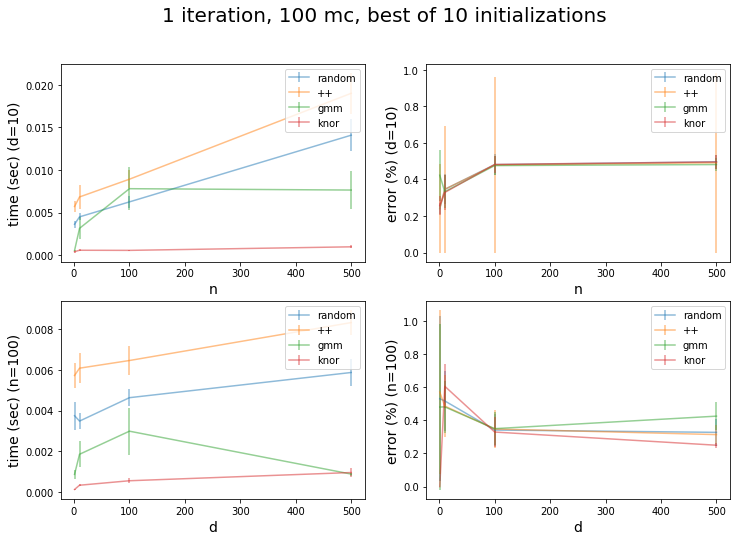

10 centroid seeds


In [20]:
x_n = [1,10,100,500]
plt.figure(figsize=(12,8))
plt.suptitle('1 iteration, 100 mc, best of 10 initializations', fontsize='20')
plt.subplot(221)

plt.errorbar(x_n, d_vec_1_s[0], yerr=d_vec_1_s[1], alpha=0.5, label='random')
plt.errorbar(x_n, d_vec_2_s[0], yerr=d_vec_2_s[1], alpha=0.5, label='++')
plt.errorbar(x_n, d_vec_3_s[0], yerr=d_vec_3_s[1], alpha=0.5, label='gmm')
plt.errorbar(x_n, d_vec_4_s[0], yerr=d_vec_4_s[1], alpha=0.5, label='knor')
plt.xlabel('n', fontsize='14')
plt.ylabel('time (sec) (d=10)', fontsize='14')
plt.legend(loc = 'upper right')
plt.subplot(222)

plt.errorbar(x_n, d_vec_1_s[2], yerr=d_vec_1_s[3], alpha=0.5, label='random')
plt.errorbar(x_n, d_vec_2_s[2], yerr=d_vec_2_s[3], alpha=0.5, label='++')
plt.errorbar(x_n, d_vec_3_s[2], yerr=d_vec_3_s[3], alpha=0.5, label='gmm')
plt.errorbar(x_n, d_vec_4_s[2], yerr=d_vec_4_s[3], alpha=0.5, label='knor')
plt.xlabel('n', fontsize='14')
plt.ylabel('error (%) (d=10)', fontsize='14')
plt.legend(loc = 'upper right')
plt.subplot(223)

plt.errorbar(x_n, n_vec_1_s[0], yerr=n_vec_1_s[1], alpha=0.5, label='random')
plt.errorbar(x_n, n_vec_2_s[0], yerr=n_vec_2_s[1], alpha=0.5, label='++')
plt.errorbar(x_n, n_vec_3_s[0], yerr=n_vec_3_s[1], alpha=0.5, label='gmm')
plt.errorbar(x_n, n_vec_4_s[0], yerr=n_vec_4_s[1], alpha=0.5, label='knor')
plt.xlabel('d', fontsize='14')
plt.ylabel('time (sec) (n=100)', fontsize='14')
plt.legend(loc = 'upper right')
plt.subplot(224)

plt.errorbar(x_n, n_vec_1_s[2], yerr=n_vec_1_s[3], alpha=0.5, label='random')
plt.errorbar(x_n, n_vec_2_s[2], yerr=n_vec_2_s[3], alpha=0.5, label='++')
plt.errorbar(x_n, n_vec_3_s[2], yerr=n_vec_3_s[3], alpha=0.5, label='gmm')
plt.errorbar(x_n, n_vec_4_s[2], yerr=n_vec_4_s[3], alpha=0.5, label='knor')
plt.xlabel('d', fontsize='14')
plt.ylabel('error (%) (n=100)', fontsize='14')
plt.legend(loc = 'upper right')
plt.show()
print('10 centroid seeds')

In [24]:
x_n = [100, 500, 1000, 1500, 2000]
n_vec_1, d_vec_1 = get_monte_data(\
                    x=x_n, d=100, n=1000, n_iter=100,\
                    init0='random', clf='kmeans') #time, time std, error, error std
n_vec_2, d_vec_2 = get_monte_data(\
                    x=x_n, d=100, n=1000, n_iter=100,\
                    init0='k-means++', clf='kmeans') #time, time std, error, error std
n_vec_3, d_vec_3 = get_monte_data(\
                    x=x_n, d=100, n=1000, n_iter=100,\
                    init0='random', clf='gmm') #time, time std, error, error std
n_vec_4, d_vec_4 = get_monte_data(\
                    x=x_n, d=100, n=1000, n_iter=100,\
                    init0='random', clf='knor') #time, time std, error, error std


  0%|          | 0/5 [00:00<?, ?it/s]
Exception in thread Thread-31:
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

  0%|          | 0/5 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [26]:
print(d_vec_1)

([0.020893511772155763, 0.17139316320419312, 0.33355716943740843, 0.48344804763793947, 0.6361271524429322], [0.0015772155945700005, 0.009589850675081172, 0.011249155246669973, 0.02900728636104965, 0.019121930518605848], [0.47601000000000004, 0.49420499999999995, 0.4951049999999999, 0.498945, 0.49879499999999993], [0.06032864079357333, 0.02437622766139174, 0.019602588477035374, 0.017461657281025767, 0.014220600374105169])


ValueError: shape mismatch: objects cannot be broadcast to a single shape

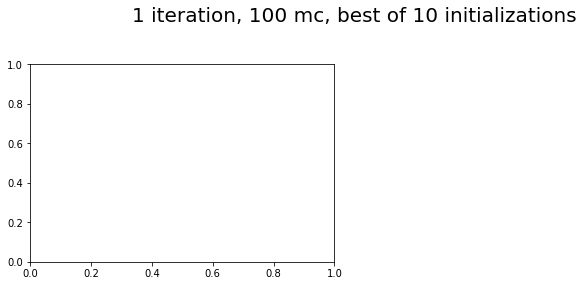

In [27]:
x_n = [1,10,100,500]
plt.figure(figsize=(12,8))
plt.suptitle('1 iteration, 100 mc, best of 10 initializations', fontsize='20')
plt.subplot(221)

plt.errorbar(x_n, d_vec_1[0], yerr=d_vec_1[1], alpha=0.5, label='random')
plt.errorbar(x_n, d_vec_2[0], yerr=d_vec_2[1], alpha=0.5, label='++')
plt.errorbar(x_n, d_vec_3[0], yerr=d_vec_3[1], alpha=0.5, label='gmm')
#plt.errorbar(x_n, d_vec_4[0], yerr=d_vec_4[1], alpha=0.5, label='knor')
plt.xlabel('n', fontsize='14')
plt.ylabel('time (sec) (d=100)', fontsize='14')
plt.legend(loc = 'upper right')
plt.subplot(222)

plt.errorbar(x_n, d_vec_1[2], yerr=d_vec_1[3], alpha=0.5, label='random')
plt.errorbar(x_n, d_vec_2[2], yerr=d_vec_2[3], alpha=0.5, label='++')
plt.errorbar(x_n, d_vec_3[2], yerr=d_vec_3[3], alpha=0.5, label='gmm')
#plt.errorbar(x_n, d_vec_4[2], yerr=d_vec_4[3], alpha=0.5, label='knor')
plt.xlabel('n', fontsize='14')
plt.ylabel('error (%) (d=100)', fontsize='14')
plt.legend(loc = 'upper right')
plt.subplot(223)

plt.errorbar(x_n, n_vec_1[0], yerr=n_vec_1[1], alpha=0.5, label='random')
plt.errorbar(x_n, n_vec_2[0], yerr=n_vec_2[1], alpha=0.5, label='++')
plt.errorbar(x_n, n_vec_3[0], yerr=n_vec_3[1], alpha=0.5, label='gmm')
#plt.errorbar(x_n, n_vec_4[0], yerr=n_vec_4[1], alpha=0.5, label='knor')
plt.xlabel('d', fontsize='14')
plt.ylabel('time (sec) (n=1000)', fontsize='14')
plt.legend(loc = 'upper right')
plt.subplot(224)

plt.errorbar(x_n, n_vec_1[2], yerr=n_vec_1[3], alpha=0.5, label='random')
plt.errorbar(x_n, n_vec_2[2], yerr=n_vec_2[3], alpha=0.5, label='++')
plt.errorbar(x_n, n_vec_3[2], yerr=n_vec_3[3], alpha=0.5, label='gmm')
#plt.errorbar(x_n, n_vec_4[2], yerr=n_vec_4[3], alpha=0.5, label='knor')
plt.xlabel('d', fontsize='14')
plt.ylabel('error (%) (n=1000)', fontsize='14')
plt.legend(loc = 'upper right')
plt.show()
print('10 centroid seeds')

In [3]:
x_n = [1,10,100,500]
n_vec_1, d_vec_1, i_vec_1 = count_iters(\
                    x=x_n, d=10, n=100, n_iter=100,\
                    init0='random')
n_vec_2, d_vec_2, i_vec_2 = count_iters(\
                    x=x_n, d=10, n=100, n_iter=100,\
                    init0='k-means++')

100%|██████████| 4/4 [00:19<00:00,  4.80s/it]


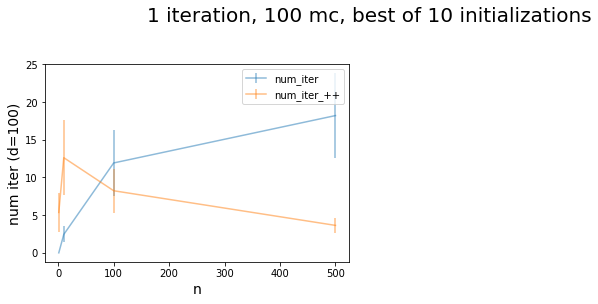

In [6]:
x_n = [1,10,100,500]
plt.figure(figsize=(12,8))
plt.suptitle('1 iteration, 100 mc, best of 10 initializations', fontsize='20')
plt.subplot(221)

#plt.errorbar(x_n, d_vec_1[0], yerr=d_vec_1[1], alpha=0.5, label='random')
#plt.errorbar(x_n, d_vec_2[0], yerr=d_vec_2[1], alpha=0.5, label='++')
plt.errorbar(x_n, i_vec_1[0], yerr=i_vec_1[1], alpha=0.5, label='num_iter')
plt.errorbar(x_n, i_vec_2[2], yerr=i_vec_2[3], alpha=0.5, label='num_iter_++')
#plt.errorbar(x_n, d_vec_4[2], yerr=d_vec_4[3], alpha=0.5, label='knor')
plt.xlabel('n', fontsize='14')
plt.ylabel('num iter (d=100)', fontsize='14')
plt.legend(loc = 'upper right')

plt.show()